# Proyecto de predicción de fugas en compañía telefónica - modelos básicos

In [1]:
TRANSFORMAR_A_LOG = True

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("../datasets/fuga_clientes_empresa_telefonica_construccion.csv")

In [4]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [5]:
df.sample(5)

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
947,ADF0077,97,3.23,48.7200,0.00,10.00,13034.1445,7,0,2676,1,Other,Other,ToCall,Mango,1
531,ADF1134,4153,138.43,423.9300,7.60,3.75,157.5615,75,3408,14160,5,3G,3G,Uxaa,Uxaa,0
1075,ADF1116,864,28.80,369.1384,0.00,1.25,17.3145,156,8408,7377,1,Other,Other,Uxaa,Uxaa,0
553,ADF1197,307,10.23,539.2400,10.50,135.00,21856.3565,49,762,3498,2,3G,3G,Uxaa,Uxaa,0
35,ADF0309,1070,35.67,427.3776,1.75,26.25,16845.0557,176,5263,7771,2,2G,3G,PQza,PQza,0


In [6]:
df.shape

(1111, 16)

In [7]:
# variables numéricas
df.describe()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1.111000e+03,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,1512.755176,50.425257,834.722058,30.659469,67.214968,2.341847e+06,202.863186,6060.639964,16259.369037,1.985599,0.485149
std,1271.675167,42.389049,1317.299763,58.605916,323.572908,7.340746e+06,300.182565,11965.611198,37216.839277,2.496442,0.500004
min,-5.000000,-0.170000,4.910000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.000000,1.000000,0.000000
25%,381.500000,12.715000,172.292000,3.480000,1.250000,1.417291e+03,18.000000,36.000000,1107.500000,1.000000,0.000000
50%,1244.000000,41.470000,615.730000,14.000000,11.250000,1.485742e+05,82.000000,1482.000000,4176.000000,1.000000,0.000000
75%,2290.500000,76.350000,1021.236600,31.635000,50.625000,1.303951e+06,251.000000,6678.000000,13321.000000,2.000000,1.000000
max,5451.000000,181.700000,24438.830000,665.000000,8295.000000,9.945640e+07,2184.000000,146344.000000,384648.000000,49.000000,1.000000


In [8]:
df.describe(include=object)

,Customer ID,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2
count,1111,1111,1089,1110,1110
unique,1111,3,3,7,6
top,ADF0266,3G,3G,PQza,Uxaa
freq,1,636,634,273,632


In [9]:
df.columns, len(df.columns)

(Index(['Customer ID', 'network_age', 'Customer tenure in month',
        'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
        'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
        'Total Onnet spend', 'Total Offnet spend',
        'Total Call centre complaint calls',
        'Network type subscription in Month 1',
        'Network type subscription in Month 2',
        'Most Loved Competitor network in in Month 1',
        'Most Loved Competitor network in in Month 2', 'Churn Status'],
       dtype='object'), 16)

In [10]:
aux = df.isna().sum()
aux[aux>0]

Network type subscription in Month 2           22
Most Loved Competitor network in in Month 1     1
Most Loved Competitor network in in Month 2     1
dtype: int64

In [11]:
df_expl = pd.read_csv("../datasets/fuga_clientes_empresa_telefonica_explotacion.csv")
print(df_expl.shape)
aux2 = df_expl.isna().sum()
aux2[aux2>0]

(289, 16)


Network type subscription in Month 1    175
Network type subscription in Month 2    122
Churn Status                            289
dtype: int64

En vista de los resultados, se eliminan todas las filas de training que tienen algún nan en alguna columna. Por otra parte, se eliminan, tanto de training como de test, las variables **Network type subscription in Month 1** y **Network type subscription in Month 2**.

In [12]:
df = df.drop(["Network type subscription in Month 1",
              "Network type subscription in Month 2"], axis=1)

df_expl = df_expl.drop(["Network type subscription in Month 1",
                        "Network type subscription in Month 2"], axis=1)

In [13]:
df.shape, df_expl.shape

((1111, 14), (289, 14))

In [14]:
aux = df.isna().sum()
aux[aux>0]

Most Loved Competitor network in in Month 1    1
Most Loved Competitor network in in Month 2    1
dtype: int64

In [15]:
aux2 = df_expl.isna().sum()
aux2[aux2>0]

Churn Status    289
dtype: int64

In [16]:
df = df.dropna(axis=0)
print(df.shape)
aux = df.isna().sum()
aux[aux>0]

(1110, 14)


Series([], dtype: int64)

In [17]:
df.shape, df_expl.shape

((1110, 14), (289, 14))

In [18]:
df_num = pd.get_dummies(df.drop('Customer ID', axis=1))
df_num.insert(loc=0, value=df['Customer ID'], column='Customer ID')
print(list(df_num.columns))
df_num.head(3)

['Customer ID', 'network_age', 'Customer tenure in month', 'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend', 'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls', 'Total Onnet spend', 'Total Offnet spend', 'Total Call centre complaint calls', 'Churn Status', 'Most Loved Competitor network in in Month 1_0', 'Most Loved Competitor network in in Month 1_Mango', 'Most Loved Competitor network in in Month 1_PQza', 'Most Loved Competitor network in in Month 1_ToCall', 'Most Loved Competitor network in in Month 1_Uxaa', 'Most Loved Competitor network in in Month 1_Weematel', 'Most Loved Competitor network in in Month 1_Zintel', 'Most Loved Competitor network in in Month 2_Mango', 'Most Loved Competitor network in in Month 2_PQza', 'Most Loved Competitor network in in Month 2_ToCall', 'Most Loved Competitor network in in Month 2_Uxaa', 'Most Loved Competitor network in in Month 2_Weematel', 'Most Loved Competitor network in in Month 2_Zintel']


,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status,Most Loved Competitor network in in Month 1_0,Most Loved Competitor network in in Month 1_Mango,Most Loved Competitor network in in Month 1_PQza,Most Loved Competitor network in in Month 1_ToCall,Most Loved Competitor network in in Month 1_Uxaa,Most Loved Competitor network in in Month 1_Weematel,Most Loved Competitor network in in Month 1_Zintel,Most Loved Competitor network in in Month 2_Mango,Most Loved Competitor network in in Month 2_PQza,Most Loved Competitor network in in Month 2_ToCall,Most Loved Competitor network in in Month 2_Uxaa,Most Loved Competitor network in in Month 2_Weematel,Most Loved Competitor network in in Month 2_Zintel
0,ADF0039,123,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,ADF0041,1316,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,ADF0051,2385,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [19]:
df_expl_num = pd.get_dummies(df_expl.drop('Customer ID', axis=1))
df_expl_num.insert(loc=0, value=df_expl['Customer ID'], column='Customer ID')
print(df_expl_num.columns)

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend', 'Total Offnet spend',
       'Total Call centre complaint calls', 'Churn Status',
       'Most Loved Competitor network in in Month 1_0',
       'Most Loved Competitor network in in Month 1_Mango',
       'Most Loved Competitor network in in Month 1_PQza',
       'Most Loved Competitor network in in Month 1_ToCall',
       'Most Loved Competitor network in in Month 1_Uxaa',
       'Most Loved Competitor network in in Month 1_Weematel',
       'Most Loved Competitor network in in Month 1_Zintel',
       'Most Loved Competitor network in in Month 2_Mango',
       'Most Loved Competitor network in in Month 2_PQza',
       'Most Loved Competitor network in in Month 2_ToCall',
       'Most Loved Competitor network in in Month 2_Uxaa',
       'Most Loved Compet

In [20]:
df["Most Loved Competitor network in in Month 2"].unique()

array(['Mango', 'PQza', 'ToCall', 'Uxaa', 'Weematel', 'Zintel'],
      dtype=object)

### Chequeo que las columnas del dataset de construcción coinciden con las del dataset de explotación

In [21]:
np.array(df_num.columns)

array(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend', 'Total Offnet spend',
       'Total Call centre complaint calls', 'Churn Status',
       'Most Loved Competitor network in in Month 1_0',
       'Most Loved Competitor network in in Month 1_Mango',
       'Most Loved Competitor network in in Month 1_PQza',
       'Most Loved Competitor network in in Month 1_ToCall',
       'Most Loved Competitor network in in Month 1_Uxaa',
       'Most Loved Competitor network in in Month 1_Weematel',
       'Most Loved Competitor network in in Month 1_Zintel',
       'Most Loved Competitor network in in Month 2_Mango',
       'Most Loved Competitor network in in Month 2_PQza',
       'Most Loved Competitor network in in Month 2_ToCall',
       'Most Loved Competitor network in in Month 2_Uxaa',
       'Most Loved Compet

In [22]:
np.array(df_expl_num.columns)

array(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend', 'Total Offnet spend',
       'Total Call centre complaint calls', 'Churn Status',
       'Most Loved Competitor network in in Month 1_0',
       'Most Loved Competitor network in in Month 1_Mango',
       'Most Loved Competitor network in in Month 1_PQza',
       'Most Loved Competitor network in in Month 1_ToCall',
       'Most Loved Competitor network in in Month 1_Uxaa',
       'Most Loved Competitor network in in Month 1_Weematel',
       'Most Loved Competitor network in in Month 1_Zintel',
       'Most Loved Competitor network in in Month 2_Mango',
       'Most Loved Competitor network in in Month 2_PQza',
       'Most Loved Competitor network in in Month 2_ToCall',
       'Most Loved Competitor network in in Month 2_Uxaa',
       'Most Loved Compet

In [23]:
np.array(df_num.columns) == np.array(df_expl_num.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [24]:
# Por si posteriormente queremos trabajar directamente a partir de
# las bases de datos limpias:
df_num.to_csv("fuga_clientes_empresa_telefonica_construccion_LIMPIO.csv", index=None)
df_expl_num.to_csv("fuga_clientes_empresa_telefonica_explotacion_LIMPIO.csv", index=None)

## Siguiente paso: trabajamos con la base de datos completamente numérica

In [25]:
#df = pd.read_csv("fuga_clientes_empresa_telefonica_construccion_LIMPIO.csv")
#df_expl = pd.read_csv("fuga_clientes_empresa_telefonica_explotacion_LIMPIO.csv")

In [26]:
df      = df_num
df_expl = df_expl_num

del df_num
del df_expl_num

In [27]:
df.std()[df.std()==0]

Series([], dtype: float64)

In [28]:
df[:5]

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status,Most Loved Competitor network in in Month 1_0,Most Loved Competitor network in in Month 1_Mango,Most Loved Competitor network in in Month 1_PQza,Most Loved Competitor network in in Month 1_ToCall,Most Loved Competitor network in in Month 1_Uxaa,Most Loved Competitor network in in Month 1_Weematel,Most Loved Competitor network in in Month 1_Zintel,Most Loved Competitor network in in Month 2_Mango,Most Loved Competitor network in in Month 2_PQza,Most Loved Competitor network in in Month 2_ToCall,Most Loved Competitor network in in Month 2_Uxaa,Most Loved Competitor network in in Month 2_Weematel,Most Loved Competitor network in in Month 2_Zintel
0,ADF0039,123,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,ADF0041,1316,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,ADF0051,2385,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,ADF0059,1614,53.80,530.2000,6.85,1.25,3.3447,69,6822,6274,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,ADF0060,2175,72.50,554.1300,6.99,153.75,673204.0342,33,3387,7241,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [29]:
print(df.shape)
df.describe()

(1110, 25)


,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status,Most Loved Competitor network in in Month 1_0,Most Loved Competitor network in in Month 1_Mango,Most Loved Competitor network in in Month 1_PQza,Most Loved Competitor network in in Month 1_ToCall,Most Loved Competitor network in in Month 1_Uxaa,Most Loved Competitor network in in Month 1_Weematel,Most Loved Competitor network in in Month 1_Zintel,Most Loved Competitor network in in Month 2_Mango,Most Loved Competitor network in in Month 2_PQza,Most Loved Competitor network in in Month 2_ToCall,Most Loved Competitor network in in Month 2_Uxaa,Most Loved Competitor network in in Month 2_Weematel,Most Loved Competitor network in in Month 2_Zintel
count,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1.110000e+03,1110.000000,1110.00000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000
mean,1512.038739,50.401378,835.039915,30.687090,67.162910,2.343397e+06,203.043243,6066.10000,16273.468468,1.986486,0.485586,0.027027,0.154054,0.245946,0.145946,0.221622,0.096396,0.109009,0.082883,0.233333,0.047748,0.569369,0.037838,0.028829
std,1272.024046,42.400681,1317.850917,58.625098,323.714105,7.343873e+06,300.257845,11969.62004,37230.646293,2.497392,0.500017,0.162235,0.361163,0.430841,0.353211,0.415525,0.295267,0.311791,0.275829,0.423143,0.213328,0.495388,0.190890,0.167401
min,-5.000000,-0.170000,4.910000,0.000000,0.000000,5.860000e-02,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,381.250000,12.707500,172.196000,3.492500,1.250000,1.410266e+03,18.000000,36.00000,1111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1243.500000,41.450000,616.341000,14.000000,11.250000,1.472994e+05,82.000000,1488.00000,4185.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2288.000000,76.267500,1021.458300,31.637500,50.000000,1.304779e+06,251.000000,6678.00000,13327.500000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,5451.000000,181.700000,24438.830000,665.000000,8295.000000,9.945640e+07,2184.000000,146344.00000,384648.000000,49.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df[df["network_age"]<0]

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status,Most Loved Competitor network in in Month 1_0,Most Loved Competitor network in in Month 1_Mango,Most Loved Competitor network in in Month 1_PQza,Most Loved Competitor network in in Month 1_ToCall,Most Loved Competitor network in in Month 1_Uxaa,Most Loved Competitor network in in Month 1_Weematel,Most Loved Competitor network in in Month 1_Zintel,Most Loved Competitor network in in Month 2_Mango,Most Loved Competitor network in in Month 2_PQza,Most Loved Competitor network in in Month 2_ToCall,Most Loved Competitor network in in Month 2_Uxaa,Most Loved Competitor network in in Month 2_Weematel,Most Loved Competitor network in in Month 2_Zintel
490,ADF0631,-5,-0.17,857.1008,63.47,190.03,1.565901e+06,204,716,1240,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0
916,ADF1925,-4,-0.13,2898.8240,25.10,1.25,3.058533e+05,642,0,82221,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0


In [31]:
df_expl[df_expl["network_age"]<0]

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status,Most Loved Competitor network in in Month 1_0,Most Loved Competitor network in in Month 1_Mango,Most Loved Competitor network in in Month 1_PQza,Most Loved Competitor network in in Month 1_ToCall,Most Loved Competitor network in in Month 1_Uxaa,Most Loved Competitor network in in Month 1_Weematel,Most Loved Competitor network in in Month 1_Zintel,Most Loved Competitor network in in Month 2_Mango,Most Loved Competitor network in in Month 2_PQza,Most Loved Competitor network in in Month 2_ToCall,Most Loved Competitor network in in Month 2_Uxaa,Most Loved Competitor network in in Month 2_Weematel,Most Loved Competitor network in in Month 2_Zintel
52,ADF1623,-2,-0.07,130.578,94.85,1.25,2.1953,7,150,1121,1,NaN,0,0,0,0,1,0,0,0,0,0,1,0,0


In [32]:
df      = df[df["network_age"]>=0]
df_expl = df_expl[df_expl["network_age"]>=0]

In [33]:
df.describe().loc[["min","max"]]

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status,Most Loved Competitor network in in Month 1_0,Most Loved Competitor network in in Month 1_Mango,Most Loved Competitor network in in Month 1_PQza,Most Loved Competitor network in in Month 1_ToCall,Most Loved Competitor network in in Month 1_Uxaa,Most Loved Competitor network in in Month 1_Weematel,Most Loved Competitor network in in Month 1_Zintel,Most Loved Competitor network in in Month 2_Mango,Most Loved Competitor network in in Month 2_PQza,Most Loved Competitor network in in Month 2_ToCall,Most Loved Competitor network in in Month 2_Uxaa,Most Loved Competitor network in in Month 2_Weematel,Most Loved Competitor network in in Month 2_Zintel
min,6.0,0.2,4.91,0.0,0.0,5.860000e-02,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,5451.0,181.7,24438.83,665.0,8295.0,9.945640e+07,2184.0,146344.0,384648.0,49.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [34]:
df_expl.describe().loc[["min","max"]]

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status,Most Loved Competitor network in in Month 1_0,Most Loved Competitor network in in Month 1_Mango,Most Loved Competitor network in in Month 1_PQza,Most Loved Competitor network in in Month 1_ToCall,Most Loved Competitor network in in Month 1_Uxaa,Most Loved Competitor network in in Month 1_Weematel,Most Loved Competitor network in in Month 1_Zintel,Most Loved Competitor network in in Month 2_Mango,Most Loved Competitor network in in Month 2_PQza,Most Loved Competitor network in in Month 2_ToCall,Most Loved Competitor network in in Month 2_Uxaa,Most Loved Competitor network in in Month 2_Weematel,Most Loved Competitor network in in Month 2_Zintel
min,95.0,3.17,16.1520,0.00,0.00,1.172000e-01,1.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,5363.0,178.77,10042.3532,873.98,493.75,3.714204e+07,2596.0,381174.0,431440.0,16.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [35]:
df.shape, df_expl.shape

((1108, 25), (288, 25))

### Creación de variables sintéticas nuevas

In [36]:
#df["ratio"] = df["Total Unique Calls"] / df["Total Spend in Months 1 and 2 of 2017"]
#df_expl["ratio"] = df_expl["Total Unique Calls"] / df_expl["Total Spend in Months 1 and 2 of 2017"]

#df["ratio2"] = df["Total Call centre complaint calls"] / df["Total Unique Calls"]
#df_expl["ratio2"] = df_expl["Total Call centre complaint calls"] / df_expl["Total Unique Calls"]

#df["ratio3"] = df["Total Unique Calls"] / df["Customer tenure in month"]
#df_expl["ratio3"] = df_expl["Total Unique Calls"] / df_expl["Customer tenure in month"]

#df["ratio3"] = df["Total Data Spend"] / df["Total Data Consumption"]
#df_expl["ratio3"] = df_expl["Total Data Spend"] / df_expl["Total Data Consumption"]

df["ratio2"] = df["Total SMS Spend"] / (1 + df["Total Offnet spend"] + df["Total Onnet spend"])
df_expl["ratio2"] = df_expl["Total SMS Spend"] / (1 + df_expl["Total Offnet spend"] + df_expl["Total Onnet spend"])

df["ratio3"] = df["Total SMS Spend"] / df["Total Unique Calls"]
df_expl["ratio3"] = df_expl["Total SMS Spend"] / df_expl["Total Unique Calls"]

df["ratio4"] = df["Total Spend in Months 1 and 2 of 2017"] * df["Total Unique Calls"]
df_expl["ratio4"] = df_expl["Total Spend in Months 1 and 2 of 2017"] * df_expl["Total Unique Calls"]


In [37]:
#sum(df["Total Unique Calls"]<300)
sum(df["Total Data Consumption"]<10000000)

1044

In [38]:
#df = df[df["Total Unique Calls"]<300]
#df_expl = df_expl[df_expl["Total Unique Calls"]<300]

#df = df[df["Total Data Consumption"]<10000000]
#df_expl = df_expl[df_expl["Total Data Consumption"]<10000000]

## Análisis exploratorio de datos 

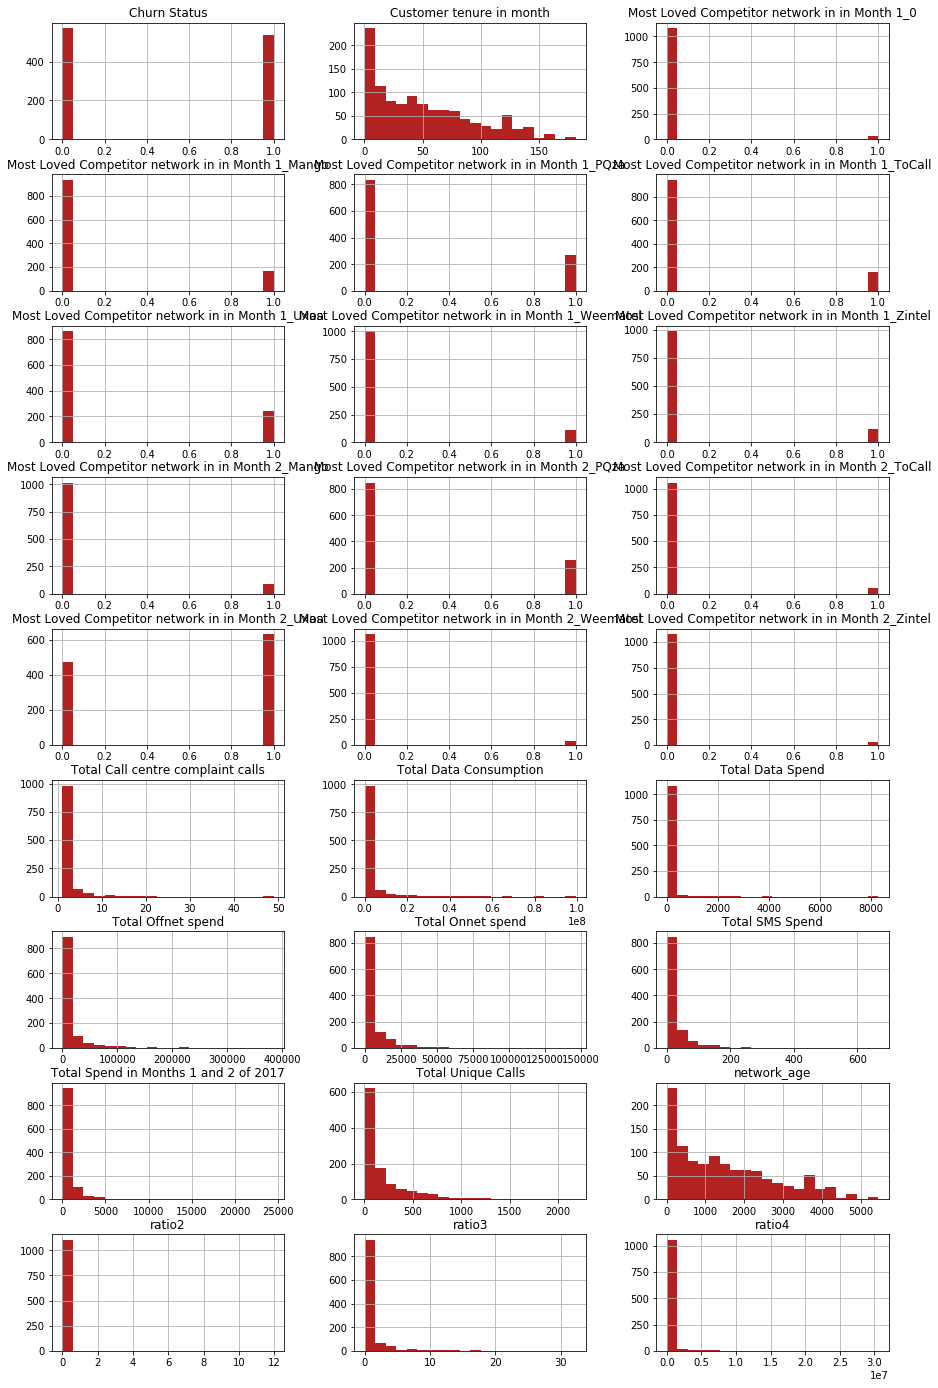

In [39]:
df.hist(color='firebrick', bins=20, layout=(11,3), figsize=(15,30));

In [40]:
names  = np.array(df.drop(["Customer ID","Churn Status","network_age"], axis=1).columns)
inds_no_dummies = [i for i,name in enumerate(names) if "Most" not in name]
inds_no_dummies
names[inds_no_dummies]

array(['Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend', 'Total Offnet spend',
       'Total Call centre complaint calls', 'ratio2', 'ratio3', 'ratio4'],
      dtype=object)

In [41]:
if TRANSFORMAR_A_LOG:
    variables_transformadas_a_log = names[inds_no_dummies]
    for name in variables_transformadas_a_log:
        df[name] = np.log(1+df[name])
        df_expl[name] = np.log(1+df_expl[name])
else:
    variables_transformadas_a_log = []

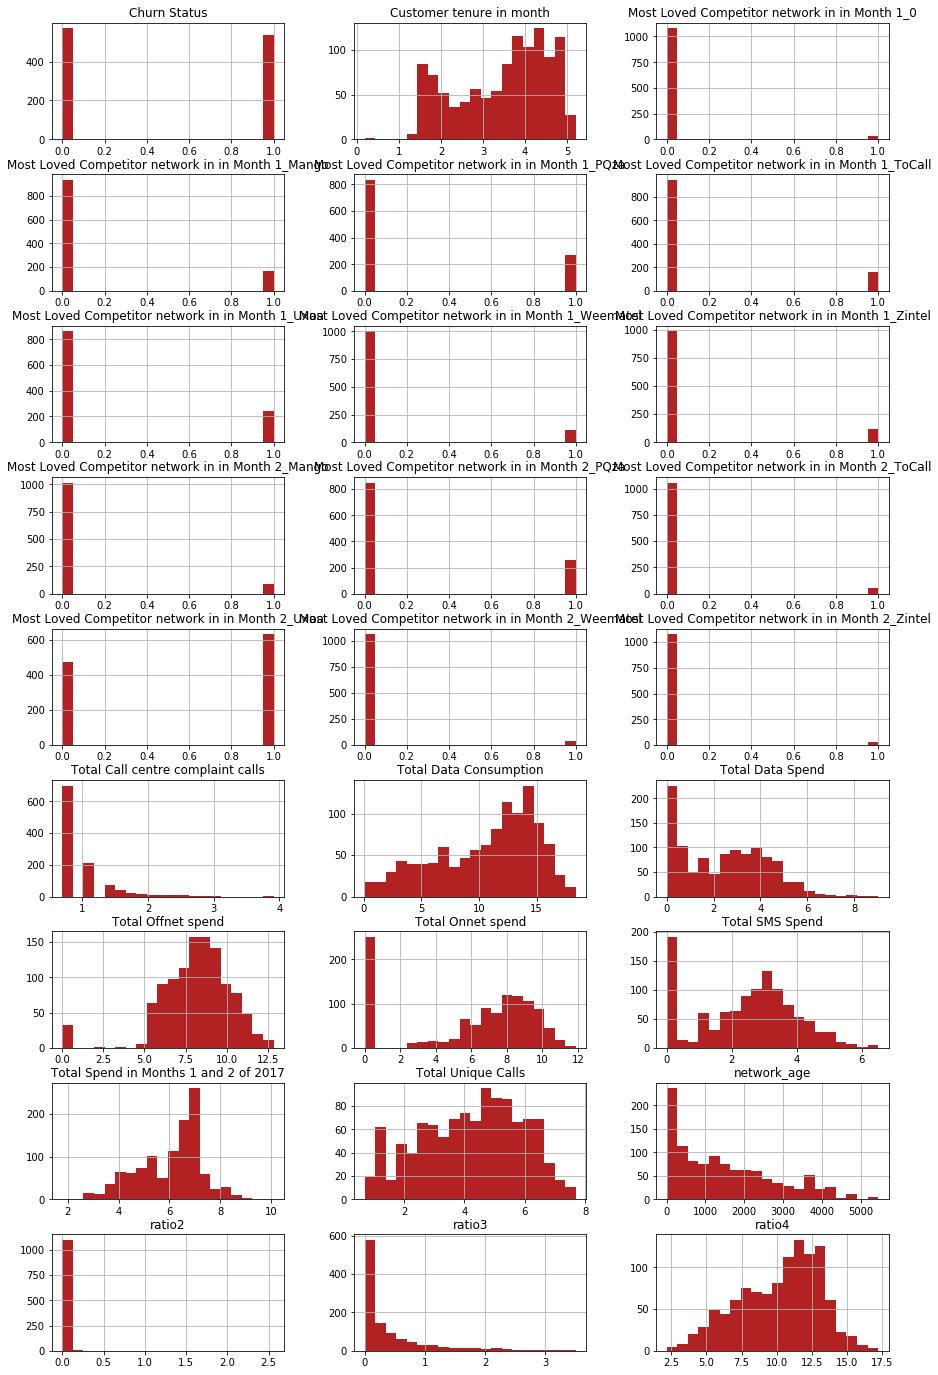

In [42]:
df.hist(color='firebrick', bins=20, layout=(11,3), figsize=(15,30));

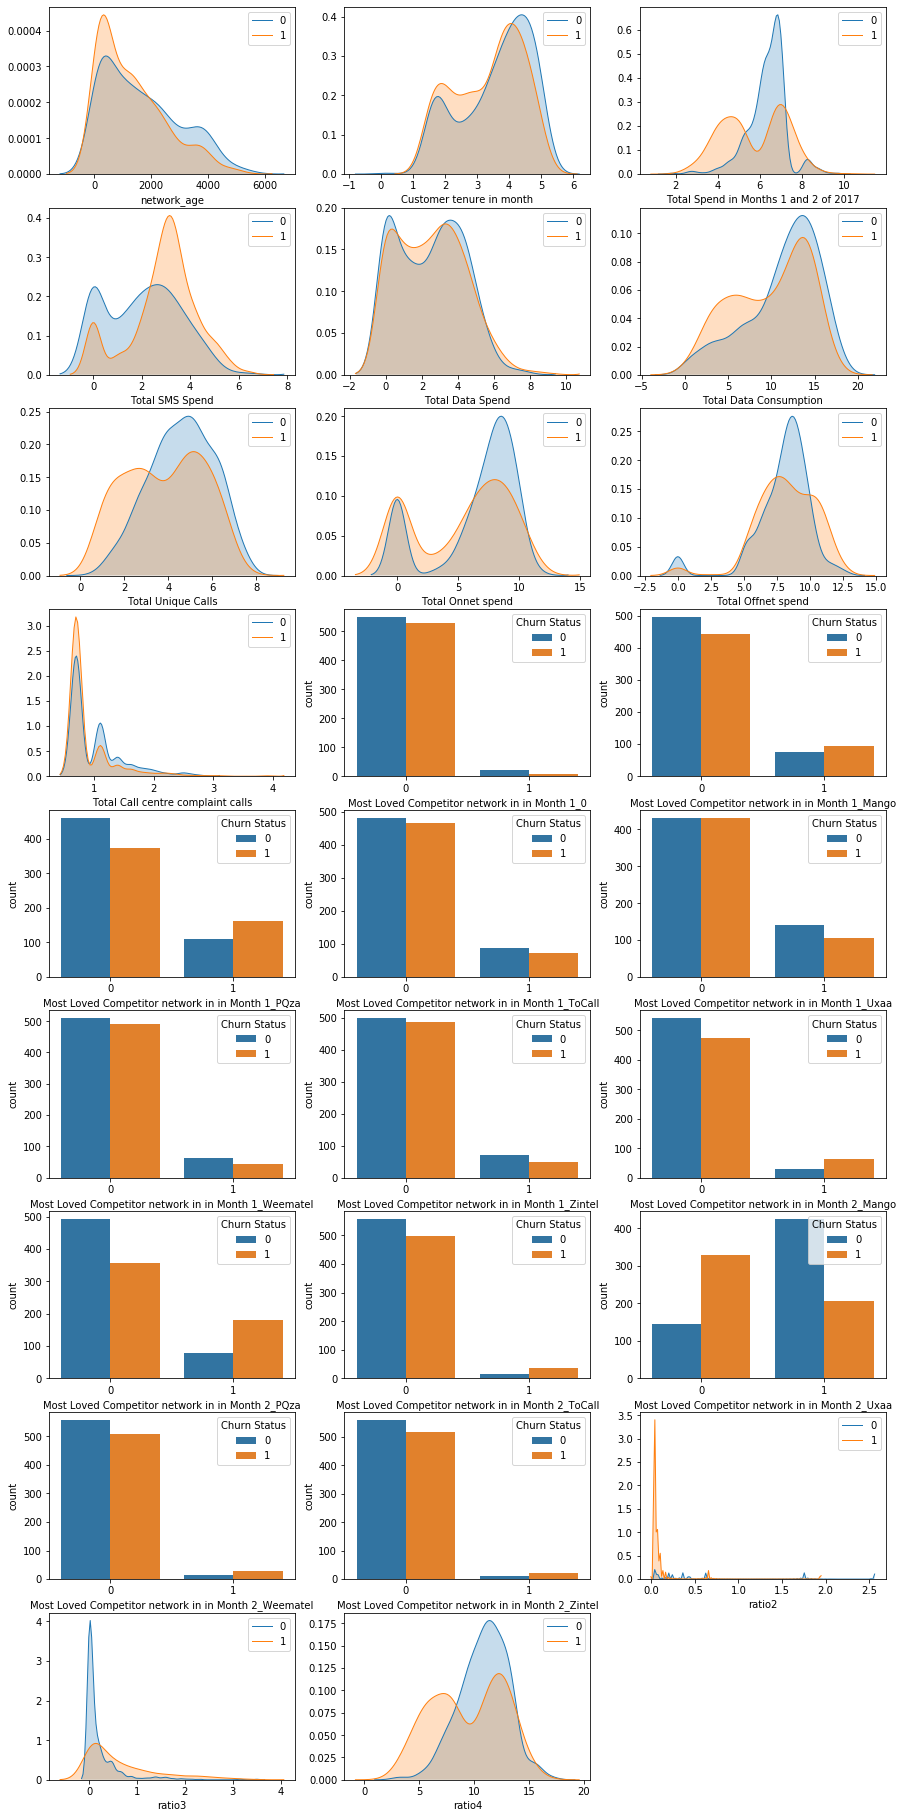

In [43]:
clases = np.unique(df["Churn Status"])
cols = list(df.columns)
cols.remove("Churn Status")
cols.remove("Customer ID")

plt.figure(figsize=(15,40))

for i,col in enumerate(cols):
    plt.subplot(11,3,i+1)
    if len(np.unique(df[col]))>2:
        for c in clases:
            sns.distplot(df[df["Churn Status"]==c][col], hist=False, kde=True,
                         kde_kws = {'shade': True, 'linewidth': 1}, 
                         label = c)
    else:
        sns.countplot(x=col, hue="Churn Status", data=df)

In [44]:
corr = df.corr()
corr.shape

(27, 27)

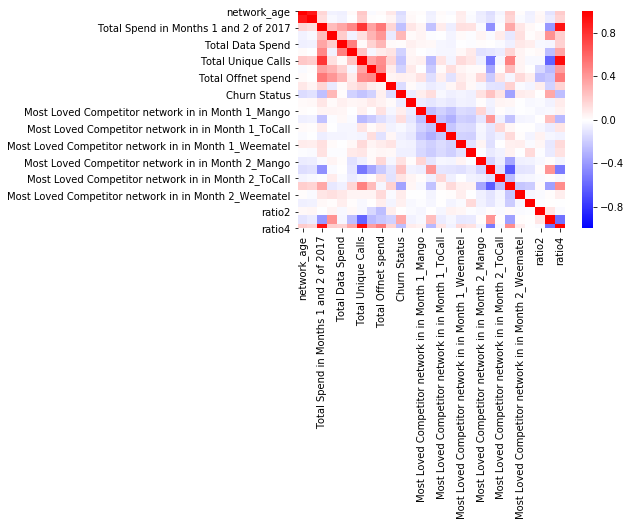

In [45]:
sns.heatmap(corr, cmap="bwr", vmax=1, vmin=-1);

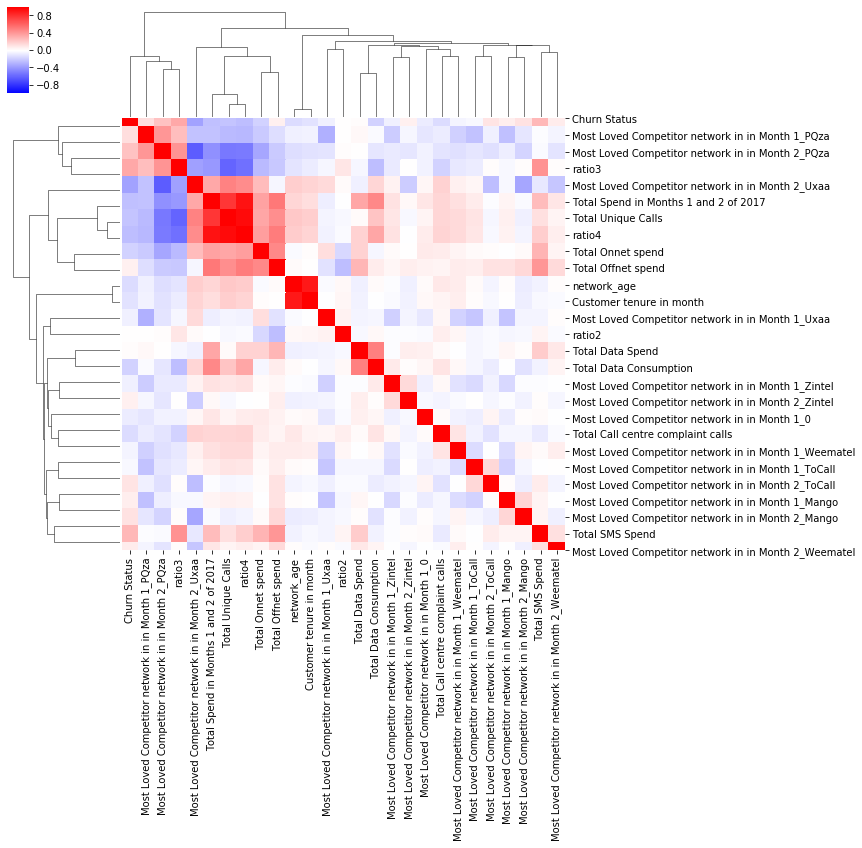

In [46]:
# Mucho mejor (se ordenan variables por semejanza en su comportamiento):
sns.clustermap(corr, cmap="bwr", vmax=1, vmin=-1);

In [47]:
# Se hace un ranking de variables más correlacionadas con el target
# (en valor absoluto) a menos correlacionadas:
corr["Churn Status"].abs().sort_values()[::-1]

Churn Status                                            1.000000
Most Loved Competitor network in in Month 2_Uxaa        0.362273
ratio3                                                  0.342226
Total SMS Spend                                         0.281030
ratio4                                                  0.256986
Total Spend in Months 1 and 2 of 2017                   0.247501
Most Loved Competitor network in in Month 2_PQza        0.236711
Total Unique Calls                                      0.233893
Total Onnet spend                                       0.175803
Total Data Consumption                                  0.173025
network_age                                             0.138106
Total Call centre complaint calls                       0.135492
Most Loved Competitor network in in Month 1_PQza        0.128614
Most Loved Competitor network in in Month 2_Mango       0.113954
Customer tenure in month                                0.111414
Most Loved Competitor net

In [48]:
df2 = df.copy()
len(df2)

1108

In [49]:
# Se añade variables de ruido en el análisis:

df2["x1"] = np.random.randn(len(df2))
df2["x2"] = np.random.randn(len(df2))
df2["x3"] = np.random.randn(len(df2))
df2["x4"] = np.random.randn(len(df2))
df2["x5"] = np.random.randn(len(df2))

In [50]:
df2.head(3)

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status,Most Loved Competitor network in in Month 1_0,Most Loved Competitor network in in Month 1_Mango,Most Loved Competitor network in in Month 1_PQza,Most Loved Competitor network in in Month 1_ToCall,Most Loved Competitor network in in Month 1_Uxaa,Most Loved Competitor network in in Month 1_Weematel,Most Loved Competitor network in in Month 1_Zintel,Most Loved Competitor network in in Month 2_Mango,Most Loved Competitor network in in Month 2_PQza,Most Loved Competitor network in in Month 2_ToCall,Most Loved Competitor network in in Month 2_Uxaa,Most Loved Competitor network in in Month 2_Weematel,Most Loved Competitor network in in Month 2_Zintel,ratio2,ratio3,ratio4,x1,x2,x3,x4,x5
0,ADF0039,123,1.629241,4.353035,0.000000,0.81093,0.914329,2.708050,6.336826,8.765459,1.098612,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0.000000,0.000000,6.980072,-2.393534,0.129725,-0.006013,-0.558586,-0.280453
1,ADF0041,1316,3.803769,4.604074,1.637053,0.81093,0.705273,3.332205,7.394493,8.383433,0.693147,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0.000690,0.142656,7.890223,0.921543,0.116217,-0.032299,-0.283832,-0.040617
2,ADF0051,2385,4.388257,5.923266,1.506297,0.81093,1.958657,4.787492,9.250714,10.000614,0.693147,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.000108,0.029069,10.699732,-0.731198,1.647110,-0.971367,1.526356,0.729272


In [51]:
corr2 = df2.corr()
corr2["Churn Status"].abs().sort_values()[::-1]

Churn Status                                            1.000000
Most Loved Competitor network in in Month 2_Uxaa        0.362273
ratio3                                                  0.342226
Total SMS Spend                                         0.281030
ratio4                                                  0.256986
Total Spend in Months 1 and 2 of 2017                   0.247501
Most Loved Competitor network in in Month 2_PQza        0.236711
Total Unique Calls                                      0.233893
Total Onnet spend                                       0.175803
Total Data Consumption                                  0.173025
network_age                                             0.138106
Total Call centre complaint calls                       0.135492
Most Loved Competitor network in in Month 1_PQza        0.128614
Most Loved Competitor network in in Month 2_Mango       0.113954
Customer tenure in month                                0.111414
Most Loved Competitor net

In [52]:
eliminar = [
    "Total Offnet spend",
    "Most Loved Competitor network in in Month 1_Weematel",
    "Most Loved Competitor network in in Month 1_ToCall",
    "Total Data Spend",
    "ratio2"
]

df = df.drop(eliminar, axis=1)
df_expl = df_expl.drop(eliminar, axis=1)

### Definición de la matriz "X" y el target "y"

In [53]:
# construcción:
X      = df.drop(["Customer ID","Churn Status","network_age"], axis=1).values
names  = np.array(df.drop(["Customer ID","Churn Status","network_age"], axis=1).columns)
variables_usadas = names
y      = df["Churn Status"].values


# explotación:
X_expl = df_expl.drop(["Customer ID","Churn Status","network_age"], axis=1).values
IDs_expl = df_expl["Customer ID"].values

In [54]:
print(names)

['Customer tenure in month' 'Total Spend in Months 1 and 2 of 2017'
 'Total SMS Spend' 'Total Data Consumption' 'Total Unique Calls'
 'Total Onnet spend' 'Total Call centre complaint calls'
 'Most Loved Competitor network in in Month 1_0'
 'Most Loved Competitor network in in Month 1_Mango'
 'Most Loved Competitor network in in Month 1_PQza'
 'Most Loved Competitor network in in Month 1_Uxaa'
 'Most Loved Competitor network in in Month 1_Zintel'
 'Most Loved Competitor network in in Month 2_Mango'
 'Most Loved Competitor network in in Month 2_PQza'
 'Most Loved Competitor network in in Month 2_ToCall'
 'Most Loved Competitor network in in Month 2_Uxaa'
 'Most Loved Competitor network in in Month 2_Weematel'
 'Most Loved Competitor network in in Month 2_Zintel' 'ratio3' 'ratio4']


In [55]:
inds_no_dummies = [i for i,name in enumerate(names) if "Most" not in name]
inds_no_dummies

[0, 1, 2, 3, 4, 5, 6, 18, 19]

In [56]:
names[inds_no_dummies]

array(['Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend', 'Total Call centre complaint calls', 'ratio3',
       'ratio4'], dtype=object)

### Separación training-test

In [57]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3,
                                          random_state=0)
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((775, 20), (333, 20), (775,), (333,))

In [58]:
X_tr.std(axis=0)

array([1.09609947, 1.27904147, 1.51987337, 4.33587659, 1.6869932 ,
       3.58099605, 0.43427995, 0.16969582, 0.36540514, 0.42550136,
       0.42145183, 0.30085829, 0.27328045, 0.42550136, 0.20765777,
       0.49407057, 0.1766847 , 0.16236545, 0.64203853, 2.90790536])

### Estandarización de los datos

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_tr[:,inds_no_dummies])
variables_estandarizadas = names[inds_no_dummies]

In [60]:
X_tr_sc = X_tr.copy()
X_tr_sc[:,inds_no_dummies] = sc.transform(X_tr[:,inds_no_dummies])

X_te_sc = X_te.copy()
X_te_sc[:,inds_no_dummies] = sc.transform(X_te[:,inds_no_dummies])

X_expl_sc = X_expl.copy()
X_expl_sc[:,inds_no_dummies] = sc.transform(X_expl[:,inds_no_dummies])
X_tr_sc.std(axis=0)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.16969582, 0.36540514, 0.42550136,
       0.42145183, 0.30085829, 0.27328045, 0.42550136, 0.20765777,
       0.49407057, 0.1766847 , 0.16236545, 1.        , 1.        ])

In [61]:
X_te_sc.std(axis=0)

array([0.96281381, 0.98686154, 1.00683283, 1.00859909, 0.95641022,
       1.04453916, 1.04005121, 0.14345431, 0.34816709, 0.44253302,
       0.40089809, 0.33534281, 0.28196263, 0.41773056, 0.22010189,
       0.49690399, 0.21386779, 0.17872284, 0.95363656, 0.95711375])

In [62]:
X_expl_sc.std(axis=0)

array([1.1130645 , 0.9734586 , 0.99751972, 0.98687932, 0.96883436,
       0.97739863, 0.82571651, 0.16433555, 0.31851843, 0.42251395,
       0.44258236, 0.30992379, 0.17399264, 0.37575477, 0.19166541,
       0.4662614 , 0.17399264, 0.21505365, 0.90866006, 0.97064685])

### Visualización en coordenadas PCA (nubes muy solapadas!)

In [63]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_tr_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [64]:
X_tr_pca = pca.fit_transform(X_tr_sc)
X_te_pca = pca.transform(X_te_sc)

X_tr_sc.shape, X_tr_pca.shape

((775, 20), (775, 20))

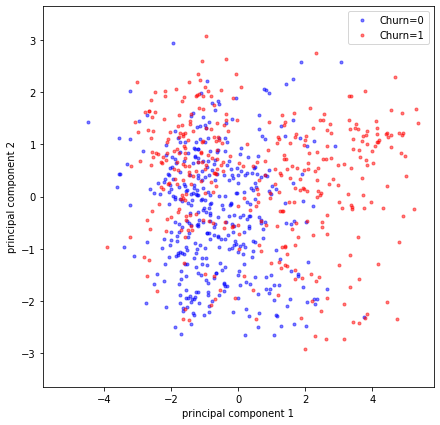

In [65]:
comp_horiz=0 # <- puedes cambiar qué componentes PCA visualizar
comp_vert =1 # (por ejemplo 0 y 1, o 1 y 2, etc.)

plt.figure(figsize=(7,7))
plt.plot(X_tr_pca[y_tr==0,comp_horiz],
         X_tr_pca[y_tr==0,comp_vert], '.', label="Churn=0",
         alpha=0.5, color="blue")
plt.plot(X_tr_pca[y_tr==1,comp_horiz],
         X_tr_pca[y_tr==1,comp_vert], '.', label="Churn=1",
         alpha=0.5, color="red")
m_horiz   = X_tr_pca[:,comp_horiz].mean()
std_horiz = X_tr_pca[:,comp_horiz].std()
m_vert    = X_tr_pca[:,comp_vert].mean()
std_vert  = X_tr_pca[:,comp_vert].std()
plt.axis([m_horiz-3*std_horiz, m_horiz+3*std_horiz,
          m_vert-3*std_vert,   m_vert+3*std_vert])
plt.xlabel('principal component '+str(comp_horiz+1))
plt.ylabel('principal component '+str(comp_vert+1))
plt.legend();

In [66]:
def curva_precision_recall(clf, X, y):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import average_precision_score
    from inspect import signature

    y_scores = clf.predict_proba(X)[:,1]
    precision, recall, ths = precision_recall_curve(y, y_scores)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2, where='post', label="Precision")
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    plt.plot(recall[1:], ths, 'r--', label="Rojo: umbral de alarma")

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    average_precision = average_precision_score(y, y_scores)

    plt.title('2-class Precision-Recall curve: AP={0:0.5f}'.format(average_precision))
    plt.legend()

In [67]:
def curva_precision(clf, X, y):
    y_scores = clf.predict_proba(X)[:,1]
    unicos = np.unique(y_scores)
    tam = []
    precision = []
    for th in unicos:
        inds = np.where(y_scores>=th)[0]
        tam.append(len(inds)/len(y))
        precision.append((y[inds]==1).mean())

    plt.plot(tam, precision, label="Precisión")
    plt.fill_between(tam, precision, alpha=0.2, color='b')
    plt.plot(tam, unicos, 'r--', label="Rojo: umbral de alarma")

    plt.xlabel('volumen alarmas')
    plt.ylabel('Precisión')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.legend()

## Clasificador Dummy (baseline)

In [68]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy='most_frequent')
clf_dummy.fit(X_tr,y_tr)

print("Scoring training:", clf_dummy.score(X_tr, y_tr))
print("Scoring test    :", clf_dummy.score(X_te, y_te))

Scoring training: 0.5096774193548387
Scoring test    : 0.5285285285285285


In [69]:
y_te.mean()

0.47147147147147145

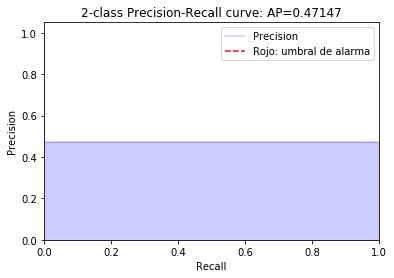

In [70]:
curva_precision_recall(clf_dummy, X_te_sc, y_te)

## Regresión Logística

In [71]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(solver='lbfgs', C=10)
clf_lr.fit(X_tr_sc, y_tr)

print("Scoring training:", clf_lr.score(X_tr_sc, y_tr))
print("Scoring test    :", clf_lr.score(X_te_sc, y_te))

Scoring training: 0.7406451612903225
Scoring test    : 0.7357357357357357


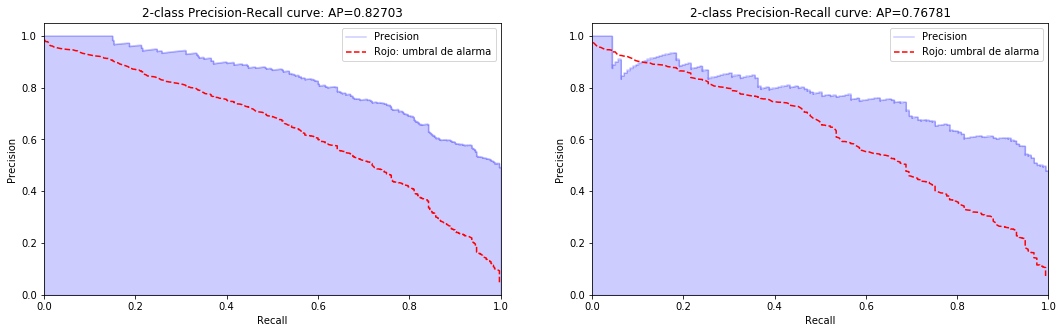

In [72]:
model = clf_lr
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
curva_precision_recall(model, X_tr_sc, y_tr)
plt.subplot(1,2,2)
curva_precision_recall(model, X_te_sc, y_te)

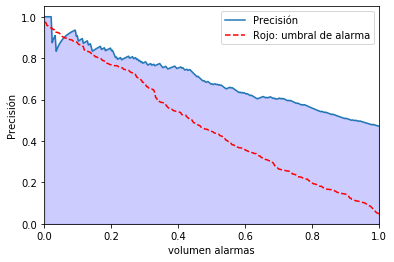

In [73]:
curva_precision(model, X_te_sc, y_te)

In [74]:
100 / len(X_expl)

0.3472222222222222

## Red Neuronal

In [75]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss

N_iters = 2000
arquitectura = (100,) # una sola capa oculta con 5 neuronas

X_tr1_sc, X_tr2_sc, y_tr1, y_tr2 = train_test_split(X_tr_sc, y_tr,
                                                    test_size=0.3,
                                                    random_state=1)

# X_tr2, y_tr2 va a ser el conjunto de validación para controlar
# el sobreajuste en training
clf_nn = MLPClassifier(verbose=False,
                       max_iter=1, random_state=7,
                       hidden_layer_sizes=arquitectura,
                       alpha=1,
                       early_stopping=False,
                       warm_start=True)

losses_tr  = []
losses_val = []
best_loss_in_val = 1e20
for i in range(N_iters):
    clf_nn.fit(X_tr1_sc, y_tr1)
    loss_tr = log_loss(y_tr1, clf_nn.predict_proba(X_tr1_sc))
    losses_tr.append(loss_tr)
    loss_val = log_loss(y_tr2, clf_nn.predict_proba(X_tr2_sc))
    losses_val.append(loss_val)
    if loss_val < best_loss_in_val:
        best_weights = clf_nn.coefs_.copy()
        best_loss_in_val = loss_val
        #print("Mejora nnet en validación")

clf_nn.coefs_ = best_weights
print("Scoring training:", clf_nn.score(X_tr_sc, y_tr))
print("Scoring test    :", clf_nn.score(X_te_sc, y_te))

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scoring training: 0.832258064516129
Scoring test    : 0.7177177177177178


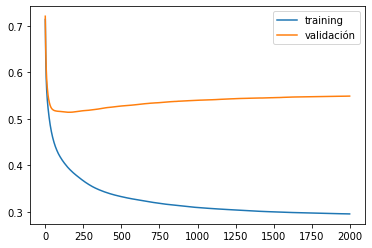

In [76]:
plt.plot(losses_tr, label="training")
plt.plot(losses_val, label="validación")
plt.legend();

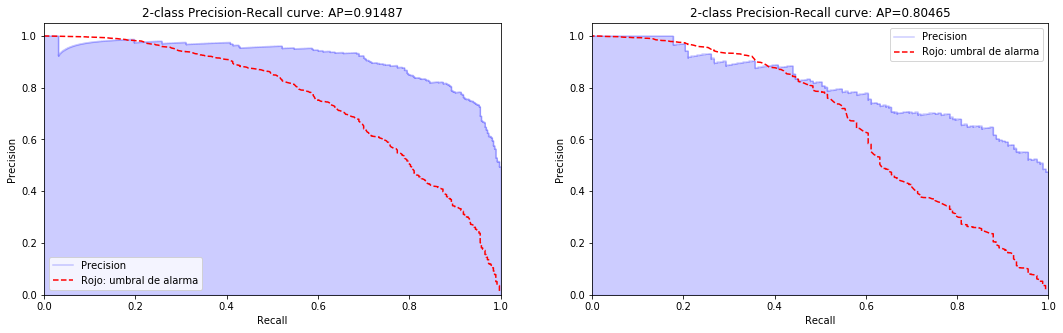

In [77]:
model = clf_nn
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
curva_precision_recall(model, X_tr_sc, y_tr)
plt.subplot(1,2,2)
curva_precision_recall(model, X_te_sc, y_te)

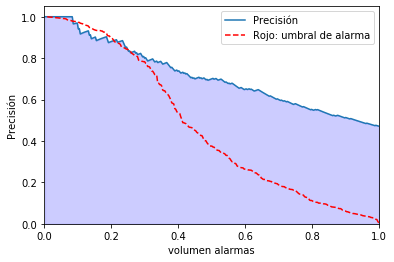

In [78]:
curva_precision(model, X_te_sc, y_te)

## SVM

In [79]:
from sklearn.svm import SVC

clf_svm = SVC(probability=True, gamma="scale")
#clf_svm = SVC(probability=True, kernel="linear")
clf_svm.fit(X_tr_sc, y_tr)

print("Scoring training:", clf_svm.score(X_tr_sc, y_tr))
print("Scoring test    :", clf_svm.score(X_te_sc, y_te))

Scoring training: 0.8296774193548387
Scoring test    : 0.6966966966966966


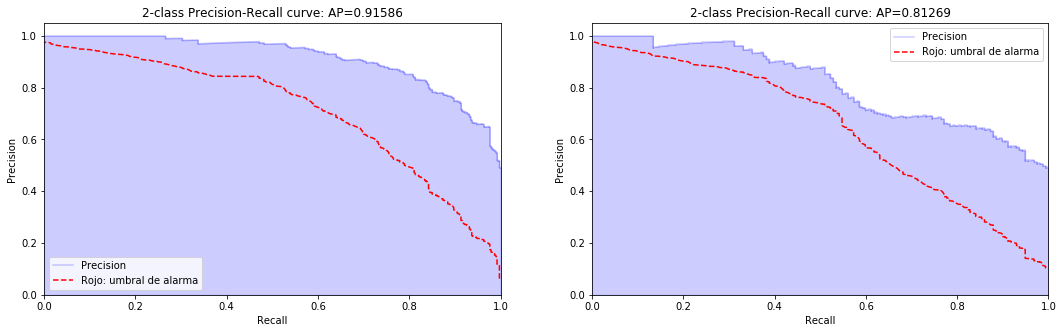

In [80]:
model = clf_svm
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
curva_precision_recall(model, X_tr_sc, y_tr)
plt.subplot(1,2,2)
curva_precision_recall(model, X_te_sc, y_te)

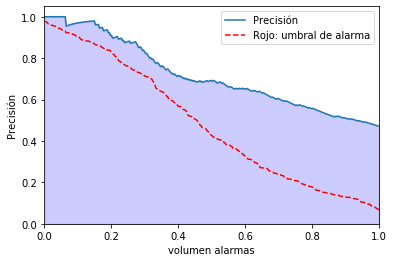

In [81]:
curva_precision(model, X_te_sc, y_te)

## Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=1001,
                                random_state=0,
                                max_features=None,
                                n_jobs=-1,
#                                max_depth=7,
#                                max_depth=5,
                                max_depth=2,
#                                min_samples_leaf=0.01,
#                               max_depth=15, 
                               )

clf_rf.fit(X_tr, y_tr)
print("Scoring training:", clf_rf.score(X_tr, y_tr))
print("Scoring test    :", clf_rf.score(X_te, y_te))

Scoring training: 0.7909677419354839
Scoring test    : 0.7567567567567568


In [83]:
100/len(X_expl)

0.3472222222222222

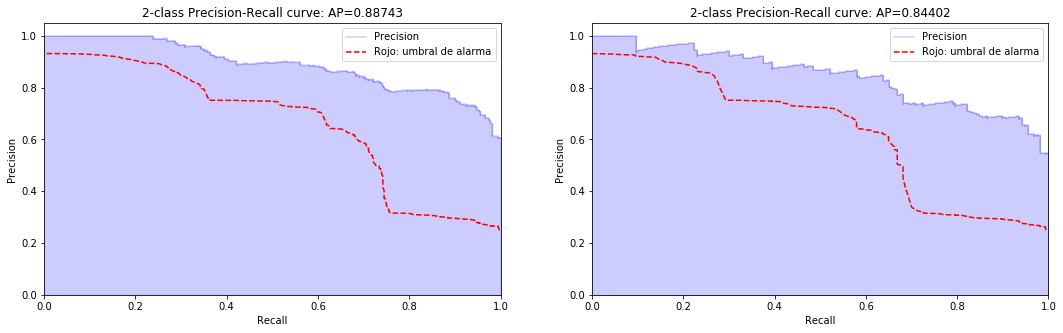

In [84]:
model = clf_rf
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
curva_precision_recall(model, X_tr, y_tr)
plt.subplot(1,2,2)
curva_precision_recall(model, X_te, y_te)

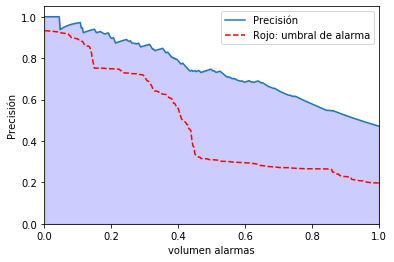

In [85]:
curva_precision(model, X_te, y_te)

In [86]:
#X_sc = X.copy()
#X_sc[:,inds_no_dummies] = sc.transform(X[:,inds_no_dummies])
clf_rf.fit(X, y) # reentreno el modelo con todos los datos

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1001,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Gradient Boosting

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb = GradientBoostingClassifier(n_estimators=5)
clf_gb.fit(X_tr_sc, y_tr)
print("Scoring training:", clf_gb.score(X_tr_sc, y_tr))
print("Scoring test    :", clf_gb.score(X_te_sc, y_te))

Scoring training: 0.8103225806451613
Scoring test    : 0.7687687687687688


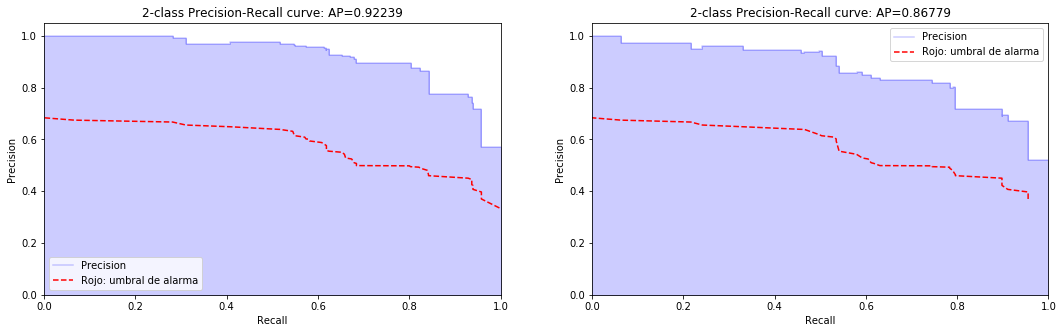

In [88]:
model = clf_gb
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
curva_precision_recall(model, X_tr_sc, y_tr)
plt.subplot(1,2,2)
curva_precision_recall(model, X_te_sc, y_te)

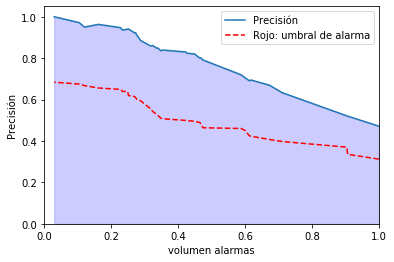

In [89]:
curva_precision(model, X_te_sc, y_te)

In [90]:
X_sc = X.copy()
X_sc[:,inds_no_dummies] = sc.transform(X_sc[:,inds_no_dummies])
clf_gb.fit(X_sc, y) # reentreno el modelo con todos los datos

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=5,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [91]:
from sklearn.model_selection import GridSearchCV

model = GradientBoostingClassifier()
grid = {"n_estimators":range(1,30), "max_depth":[3,4,5]}
gs = GridSearchCV(model, grid, cv=10, iid=False, scoring="roc_auc")
gs.fit(X_sc, y)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
        

In [92]:
clf_gb = gs.best_estimator_
#clf_gb.fit(X_tr_sc, y_tr)
gs.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=26,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# Predicciones en explotación

In [93]:
opcion = 5

# 1: regresión logística
# 2: red neuronal
# 3: SVM
# 4: random forest
# 5: gradient boosting

if opcion == 1:
    clf = clf_lr
    estandarizador = sc
    X_expl_aux = X_expl_sc
if opcion == 2:
    clf = clf_nn
    estandarizador = sc
    X_expl_aux = X_expl_sc
if opcion == 3:
    clf = clf_svm
    estandarizador = sc
    X_expl_aux = X_expl_sc
elif opcion == 4:
    clf = clf_rf
    estandarizador = None
    X_expl_aux = X_expl
elif opcion == 5:
    clf = clf_gb
    estandarizador = sc
    X_expl_aux = X_expl_sc

In [94]:
prob_fuga_expl = clf.predict_proba(X_expl_aux)[:,1]

In [95]:
prob_fuga_expl[:5]

array([0.16603645, 0.44543021, 0.23944853, 0.38128976, 0.16560594])

In [96]:
predicciones = pd.DataFrame({"Customer ID":IDs_expl,
                             "Prob Fuga":prob_fuga_expl})
predicciones[:5]

,Customer ID,Prob Fuga
0,ADF1330,0.166036
1,ADF1331,0.445430
2,ADF1345,0.239449
3,ADF1349,0.381290
4,ADF1363,0.165606


In [97]:
predicciones = predicciones.sort_values("Prob Fuga",
                                        ascending=False)[:200]
predicciones.iloc[:5]

,Customer ID,Prob Fuga
140,ADF0391,0.919275
147,ADF0442,0.919275
141,ADF0409,0.918054
177,ADF0601,0.917867
101,ADF1896,0.913433


In [98]:
predicciones[["Customer ID"]].to_csv("top_100.csv", index=None)

In [99]:
clf

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=26,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [100]:
opciones = {
    "modelo": clf,
    "variables_transformadas_a_log": variables_transformadas_a_log,
    "variables_estandarizadas": variables_estandarizadas,
    "estandarizador": estandarizador,
    "variables_usadas": variables_usadas,
}

In [101]:
import pickle

with open("modelo.pkl", "wb") as f:
    pickle.dump(opciones, f)